## Week 2 mini Assignment - extra credit string k = 15

In [1]:
import numpy as np
import pandas as pd
import time as time
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import string

### 1. We will again generate random data for this assignment.  Please set up five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  Ensure that a common random number seed is used to generate each of the arrays. 

In [2]:
# Create 5 uniformly distributed integers with size from 512, 1024, 2048, 4096 to 8192
# Create an array containing the size of these 5 random number arrays
np.random.seed(20200118)
df1 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(5000)]
df2 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(10000)]
df3 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(15000)]
df4 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(20000)]
df5 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(25000)]
len_array = np.array([len(df1), len(df2),len(df3), len(df4),len(df5)])
len_array

array([ 5000, 10000, 15000, 20000, 25000])

### 2. Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the execution time with each execution. Use one of the timing methods we learned in class.

In [3]:
# Finds the smallest value in an array
def findSmallest(array1):
    # Stores the smallest value
    smallest = array1[0]
    # Stores the index of the smallest value
    smallest_index = 0
    for i in range(1, len(array1)):
        if array1[i] < smallest:
            smallest_index = i
            smallest = array1[i]
    return smallest_index

# Sort array
def selectionSort(array1):
    newArr = []
    for i in range(len(array1)):
        # Finds the smallest element in the array and adds it to the new array
        smallest = findSmallest(array1)
        newArr.append(array1.pop(smallest))
    return newArr

In [4]:
# Sorting these 5 arrays and recording times for sorting in miliseconds
# putting recorded sorting time into an array
sort_time = np.array([])
n = 0
for j in [df1, df2, df3, df4, df5]:
    n += 1
    start = time.time()
    filename = 'df_' + str(n)
    filename1 = 'df_' + str(n)
    filename = selectionSort(j)
    end= time.time()
    sorting = round((end - start)*1000, 4)
    print('selection sort on array {0} is {1} miliseconds'.format(filename1,sorting))
    sort_time = np.append(sort_time, sorting)

selection sort on array df_1 is 924.0527 miliseconds
selection sort on array df_2 is 3671.2101 miliseconds
selection sort on array df_3 is 8224.4704 miliseconds
selection sort on array df_4 is 14726.0406 miliseconds
selection sort on array df_5 is 22960.3131 miliseconds


### 3. Just as in the last assignment, please organize the results of the study into a table showing the size of data array and the time taken to sort the array. Discuss the differences in timing and how they relate to data type and length of array.  

In [5]:
# Create a pandas dataframe to put all arrays together. 
data = {'len_array': len_array, 'sel_sort_time': sort_time}
df = pd.DataFrame(data)
df.head()

,len_array,sel_sort_time
0,5000,924.0527
1,10000,3671.2101
2,15000,8224.4704
3,20000,14726.0406
4,25000,22960.3131


#### Discussion: string (size 15) list sorting is slower than length 5 string but about the same as integer sorting.

### 4. Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against problem size for each form of the algorithm being tested.

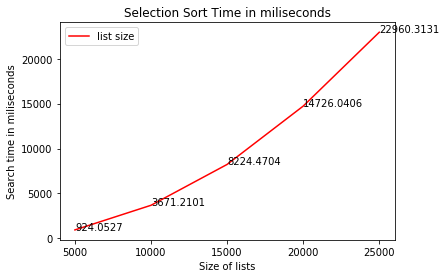

In [6]:
fig = plt.figure()
ax  = plt.axes()

# x axis is array size
x = df['len_array']
y1 = df['sel_sort_time']
plt.plot(x, y1, 'r', linestyle ='solid', label='list size')
plt.title("Selection Sort Time in miliseconds")
plt.xlabel("Size of lists")
plt.ylabel("Search time in miliseconds")
plt.xticks(np.arange(5000, 26000, 5000))
plt.legend()
for p, txt in enumerate(y1):
    ax.annotate(txt, (x[p], y1[p]))

### Executive Summary
#### Logic behind selection sort is to make a loop for the target list, each cycle, the code will pick the desired record (in this assignment, it is the smallest number), and remove this smallest number from the list and put it to the new list. The next cycle will do the same thing on the new list (one record less than last cycle) to determine the desire record and do the same operation. As loop goes on, the orignal list size will lose 1 in each cycle until the last. While the new list is adding one record from each cycle and the record is sorted based on desired interest. 

#### Overall, using the same sort technique on length 15 strings will give a little slower sort speed than length 5 string sorting which is expected. the results is a little bit faster than integer sorting. The conclusion is string sorting might be faster than numerical (integer/float) sorting or the efficiency is better on string sorting. 